In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('brent.csv')

In [3]:
df.head()

,DATE,DCOILBRENTEU
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [4]:
df.shape

(9524, 2)

In [5]:
df.rename(columns={'DATE' : 'date','DCOILBRENTEU':'price'},inplace=True)

In [6]:
df.tail()

,date,price
9519,2023-11-14,84.2
9520,2023-11-15,82.4
9521,2023-11-16,77.73
9522,2023-11-17,81.22
9523,2023-11-20,83.25


In [7]:
df.set_index('date',inplace=True)

In [8]:
df.head()

,price
date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [9]:
df.index = pd.to_datetime(df.index)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9524 entries, 1987-05-20 to 2023-11-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   9524 non-null   object
dtypes: object(1)
memory usage: 148.8+ KB


In [11]:
df.isnull().sum()

price    0
dtype: int64

In [12]:
df['price'] = df['price'].replace('.', method='pad')
df['price'] = df['price'].replace('NaN', method='pad') # replace missing values with previous value

In [13]:
df['price']=df['price'].astype('float')

In [14]:
df.to_csv('brentoil.csv')

<Axes: xlabel='date'>

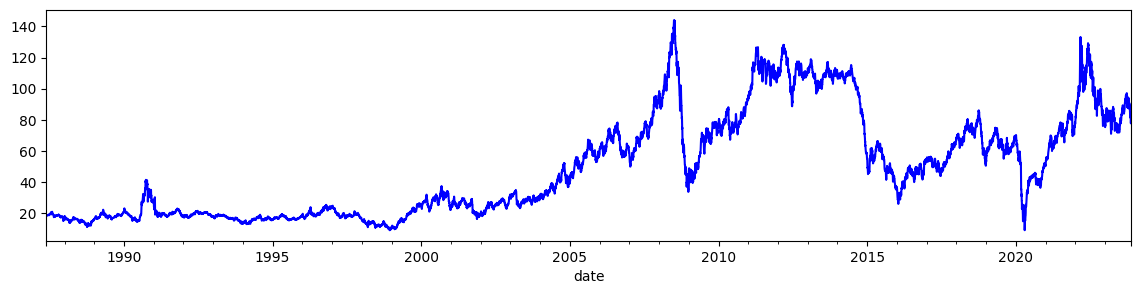

In [15]:
import seaborn as sns
df.price.plot(figsize=(14,3),color='blue')

<Axes: xlabel='date'>

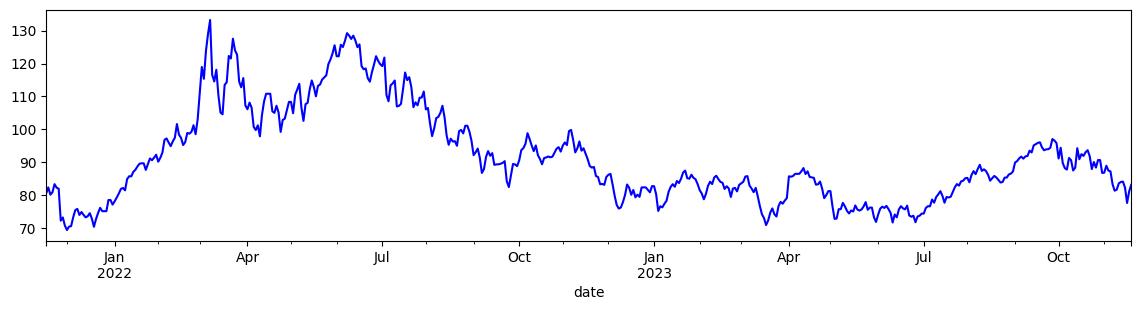

In [16]:
import seaborn as sns
df.price[9000:].plot(figsize=(14,3),color='blue')

In [17]:
df1 = pd.read_csv('brent.csv')

In [18]:
df1.head()

,DATE,DCOILBRENTEU
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [19]:
df1.rename(columns={'DATE' : 'date','DCOILBRENTEU':'price'},inplace=True)


In [20]:
df1.columns

Index(['date', 'price'], dtype='object')

In [21]:
df1['date'] = pd.to_datetime(df1['date'], format='%Y-%m-%d')

df1['Month'] = df1['date'].dt.strftime('%b')
df1['Year'] = df1['date'].dt.strftime('%Y')
df1.head()

,date,price,Month,Year
0,1987-05-20,18.63,May,1987
1,1987-05-21,18.45,May,1987
2,1987-05-22,18.55,May,1987
3,1987-05-25,18.60,May,1987
4,1987-05-26,18.63,May,1987


In [22]:
df1['price'] = df1['price'].replace('.', method='pad') # replace missing values with previous value

In [23]:
df1['price']=df1['price'].astype('float')

<Axes: xlabel='Month', ylabel='price'>

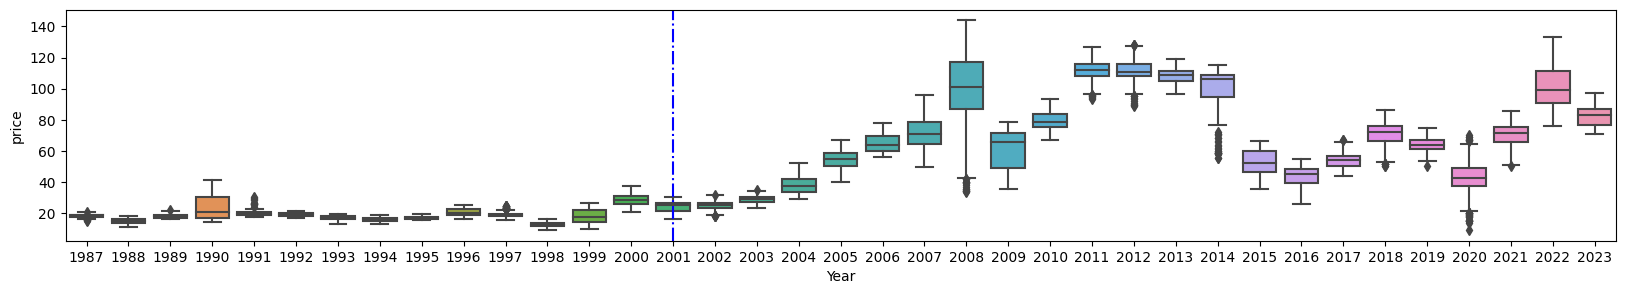

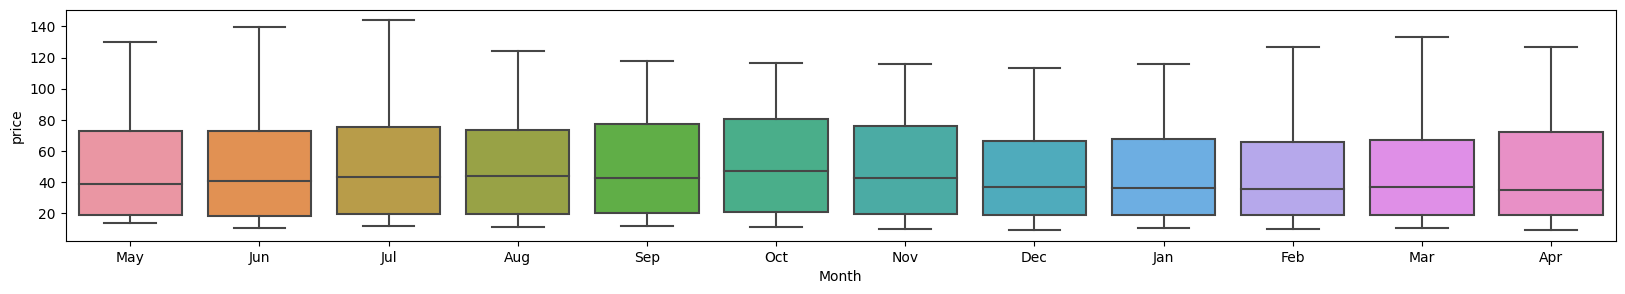

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,3))
sns.boxplot(x=df1.Year,y=df1.price)
plt.axvline(x=14,ls='-.',c='b')
plt.figure(figsize=(20,3))
sns.boxplot(x=df1.Month,y=df1.price)

### Observations  


1.Drop in oil price in 2008 from 140+ to around 40--> Financial crisis and Great recession 


2.Drop in oil prices in 2014-2016 --> lower demand for oil in Europe and China, steady supply of oil from OPEC ,Reduced geopolitical concerns https://www.opec.org/opec_web/en/about_us/25.htm  


3.Drop in 2020 --> to the COVID-19 pandemic.--> Governments closed businesses and restricted travel. oversupply of oil.  


4.2022--> rise in oil price-->Russia Ukarian war, tensions in middle east, OPEC regulations  

5.1990-->Iraq's invasion of Kuwait/Cold winter  

6.Volatile in Marcch an July --> Transition of season


### Decomposition

In [25]:
# pip install --upgrade statsmodels

In [26]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# df_decompose_add=seasonal_decompose(df,period=12,model='multiplicative')
# plt.rc('figure',figsize=(12,9))
# df_decompose_add.plot()
# plt.show()

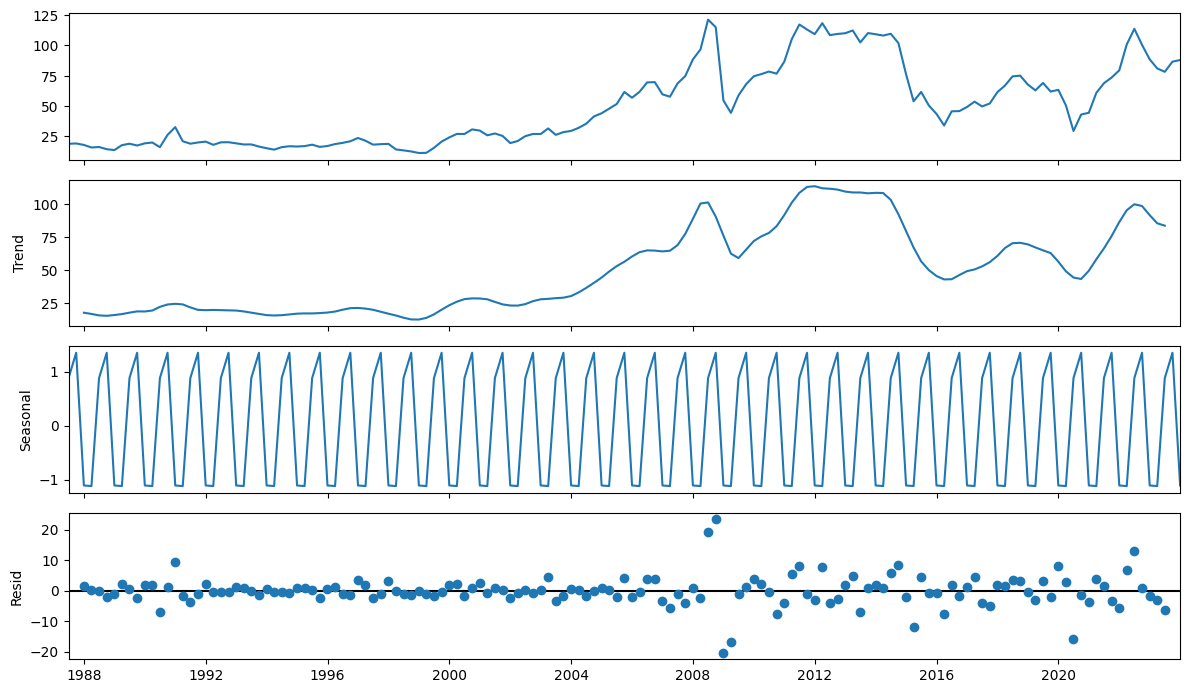

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_resampled = df.resample('Q').mean().ffill()
df_resampled.index.freq = 'Q'
df_decompose_add=seasonal_decompose(df_resampled,model='additive')
plt.rc('figure',figsize=(12,7))
df_decompose_add.plot()
plt.show()


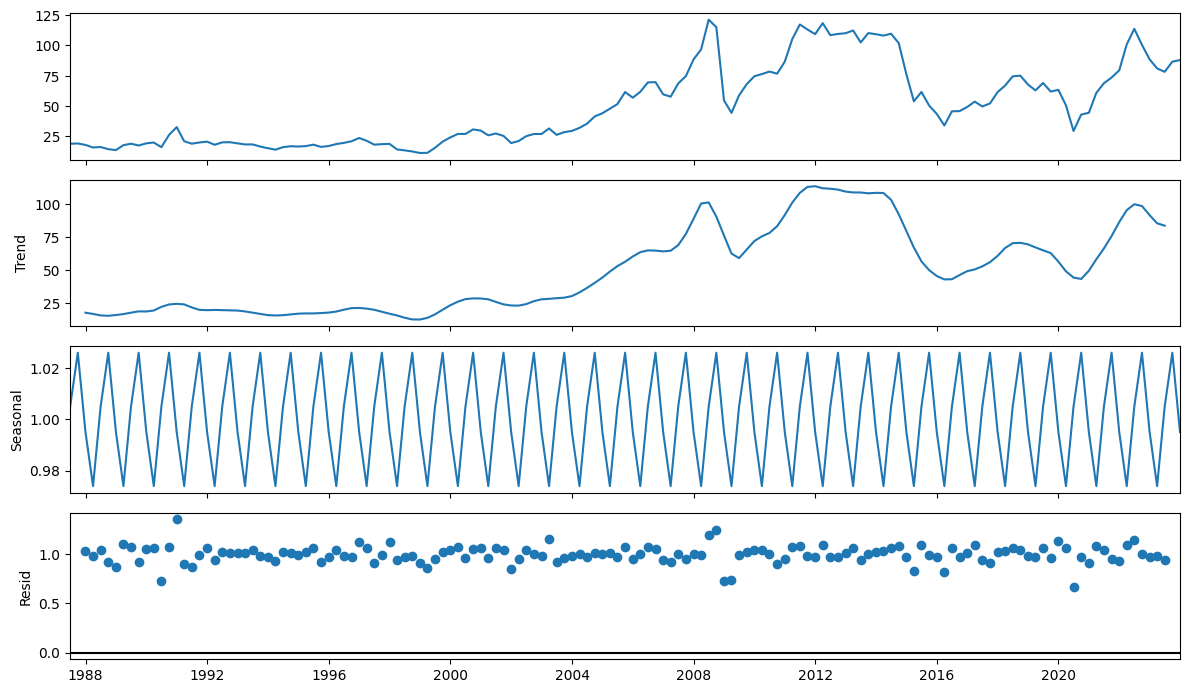

In [28]:
df_decompose_mul=seasonal_decompose(df_resampled,model='multiplicative')
plt.rc('figure',figsize=(12,7))
df_decompose_mul.plot()
plt.show()

Non-constant trend : Mean of the series is changing over time

In [29]:
df_resampled.isnull().sum()

price    0
dtype: int64

In [30]:
df_resampled

,price
date,
1987-06-30,18.783000
1987-09-30,19.063030
1987-12-31,17.853939
1988-03-31,15.732000
1988-06-30,16.115077
...,...
2022-12-31,88.530615
2023-03-31,81.092923
2023-06-30,78.244462


In [31]:
print("Trend component:", df_decompose_add.trend)
print("Seasonal component:", df_decompose_add.seasonal)
print("Residuals:", df_decompose_add.resid)

Trend component: date
1987-06-30          NaN
1987-09-30          NaN
1987-12-31    17.524502
1988-03-31    16.598985
1988-06-30    15.474985
                ...    
2022-12-31    91.545755
2023-03-31    85.364012
2023-06-30    83.555629
2023-09-30          NaN
2023-12-31          NaN
Freq: Q-DEC, Name: trend, Length: 147, dtype: float64
Seasonal component: date
1987-06-30    0.879539
1987-09-30    1.348914
1987-12-31   -1.108653
1988-03-31   -1.119801
1988-06-30    0.879539
                ...   
2022-12-31   -1.108653
2023-03-31   -1.119801
2023-06-30    0.879539
2023-09-30    1.348914
2023-12-31   -1.108653
Freq: Q-DEC, Name: seasonal, Length: 147, dtype: float64
Residuals: date
1987-06-30         NaN
1987-09-30         NaN
1987-12-31    1.438090
1988-03-31    0.252815
1988-06-30   -0.239448
                ...   
2022-12-31   -1.906487
2023-03-31   -3.151289
2023-06-30   -6.190707
2023-09-30         NaN
2023-12-31         NaN
Freq: Q-DEC, Name: resid, Length: 147, dtype: float64


In [32]:
df_decompose_add.resid

date
1987-06-30         NaN
1987-09-30         NaN
1987-12-31    1.438090
1988-03-31    0.252815
1988-06-30   -0.239448
                ...   
2022-12-31   -1.906487
2023-03-31   -3.151289
2023-06-30   -6.190707
2023-09-30         NaN
2023-12-31         NaN
Freq: Q-DEC, Name: resid, Length: 147, dtype: float64

In [33]:
 df_decompose_mul.resid

date
1987-06-30         NaN
1987-09-30         NaN
1987-12-31    1.023861
1988-03-31    0.973050
1988-06-30    1.036189
                ...   
2022-12-31    0.971870
2023-03-31    0.975306
2023-06-30    0.931783
2023-09-30         NaN
2023-12-31         NaN
Freq: Q-DEC, Name: resid, Length: 147, dtype: float64

In [34]:
# from statsmodels.tsa.stattools import adfuller
# adf_test1 = adfuller(df_decompose_add.resid)
# print(f'p-value: {adf_test1[1]}')

In [35]:
df.loc['1987-06-30']

price    19.08
Name: 1987-06-30 00:00:00, dtype: float64

In [36]:
'''Doubts'''

'Doubts'

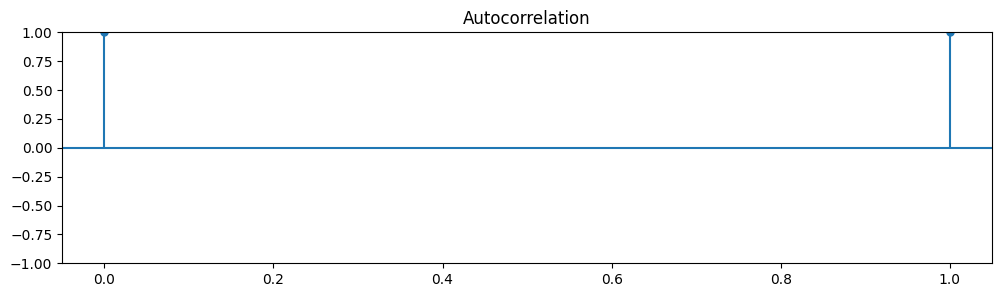

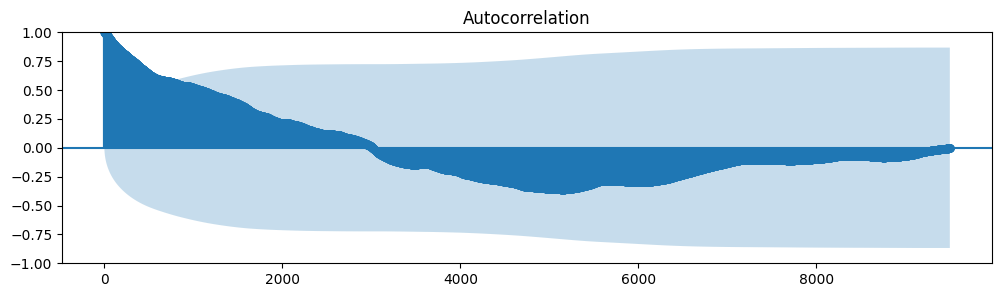

In [37]:
import statsmodels.graphics.tsaplots as tsa_plots

plt.rc('figure',figsize=(12,3))
tsa_plots.plot_acf(df.price,lags=1)
tsa_plots.plot_acf(df.price,lags=9500)
plt.show()


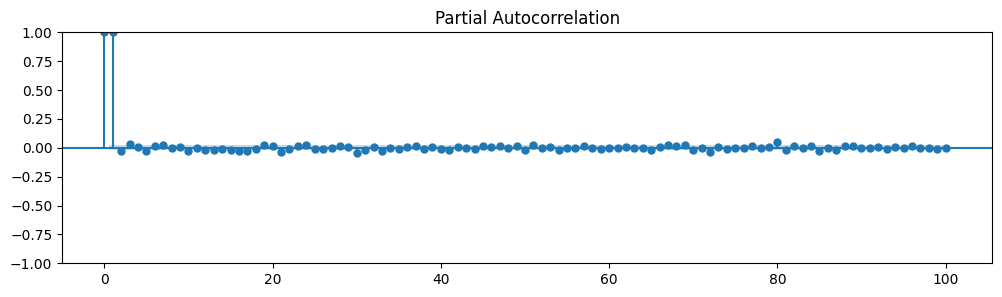

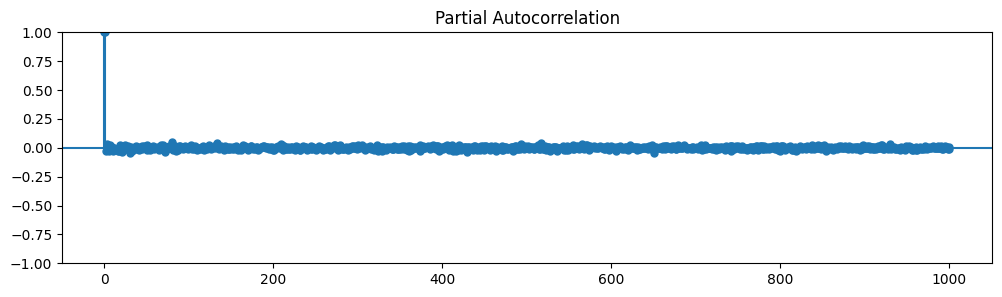

In [38]:
tsa_plots.plot_pacf(df.price,lags=100)
tsa_plots.plot_pacf(df.price,lags=1000)
# tsa_plots.plot_pacf(df.price,lags=4750)
plt.show()

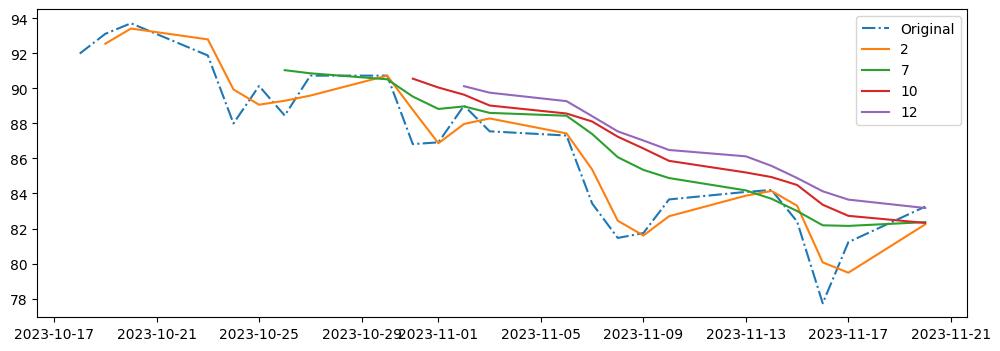

In [39]:
plt.figure(figsize=(12,4))
plt.plot(df.price[9500:],label='Original',ls='-.')
for i in [2,7,10,12]:
    plt.plot(df.price[9500:].rolling(i).mean(), label=str(i))
   
plt.legend(loc='best')

In [40]:
data = pd.read_csv('brentoil.csv')

In [41]:
data.head()

,date,price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9524 entries, 0 to 9523
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    9524 non-null   object 
 1   price   9524 non-null   float64
dtypes: float64(1), object(1)
memory usage: 148.9+ KB


In [43]:
df_resampled

,price
date,
1987-06-30,18.783000
1987-09-30,19.063030
1987-12-31,17.853939
1988-03-31,15.732000
1988-06-30,16.115077
...,...
2022-12-31,88.530615
2023-03-31,81.092923
2023-06-30,78.244462


### Check for Stationarity | Dickey-Fuller Test

In [44]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df)
print(f'p-value: {adf_test[1]}')

p-value: 0.2200203685522042


In [45]:
df_diff = df.diff().dropna() # 1st order differentiation
adf_test1 = adfuller(df_diff)
print(f'p-value: {adf_test1[1]}')

p-value: 1.163079189502685e-26


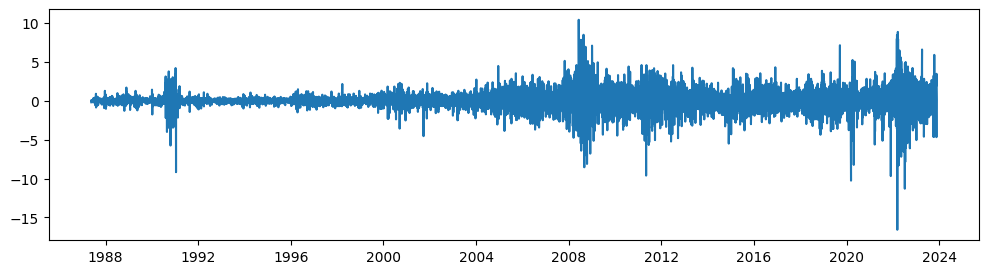

In [46]:
plt.plot(df_diff)

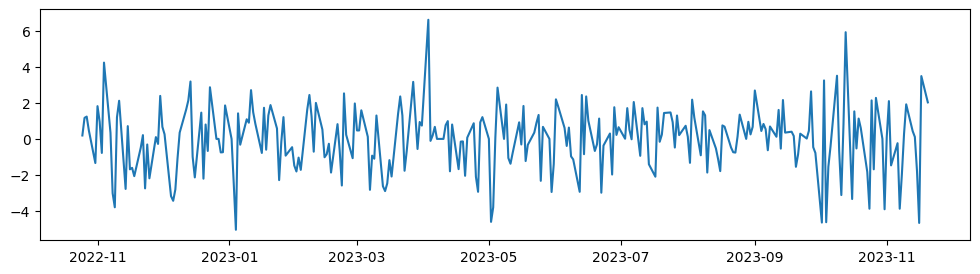

In [47]:
plt.plot(df_diff[-280:])

In [48]:
'''Split the data'''
split = int(.95 *df.shape[0])
dfTrain = df[:split]
dfTest = df[split:]


In [49]:
len(dfTrain), len(dfTest)

(9047, 477)

In [50]:
import warnings
warnings.filterwarnings("ignore")